<a list of 9 text.Text objects>

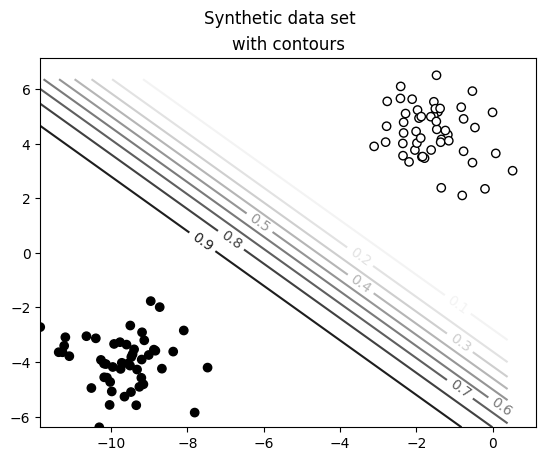

In [203]:
import sklearn.datasets as skds
from matplotlib import pyplot as plt
import numpy as np
import torch

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

# X are the samples (with two features)
# Y are the labels for each sample
X, Y = skds.make_blobs(
    # If int, number of points that is then divided equally per cluster.
    # If array, the number of points per cluster.
    n_samples=100, 

    # Number of features per point.
    n_features=2,

    # Number of centers
    centers=2,

    # Randomization seed
    random_state=1)

fig, ax = plt.subplots()
fig.suptitle("Synthetic data set")
ax.set_title("with contours")

# Scatter plot.
# Observe that X is a Tensor of shape (n_samples, n_features), i.e. a (100x2) 2d matrix.
# The first column, i.e. X[:,0] is the "x" coordinates.
# The second column, i.e. X[:,1] is the "y" coordinates. 
sc = plt.scatter(
    # x,y coordinates
    x=X[:, 0], y=X[:, 1],

    # The colors, determined by the label of each sample.
    c=Y,

    # Color mapping.
    cmap="Greys", edgecolor="black")

min_x0, min_x1 = X.min(axis=0)
max_x0, max_x1 = X.max(axis=0)

delta = .25
x0 = np.arange(min_x0, max_x0, delta)
x1 = np.arange(min_x1, max_x1, delta)

# Meshgrid is a little hard for me to wrap my head around.
# It will return a matrix of x0 as rows and a matrix of x1 as columns.
# Effectively it creates two matrices which traversing over corresponding coordinates
# yields all possible combinations from x0 and x1.
# It is useful when we want to compute y(x0, x1) for every (x0,x1) combination, e.g. for contours.
x0, x1 = np.meshgrid(x0, x1)
w0, w1, b = -1, -1, -5
# w0, w1, b = -10, -10, -50
y = sigmoid(w0*x0 + w1*x1 + b)

cs = plt.contour(
    # x, y, z
    x0, x1, y,

    # display no more than levels+1 heights
    levels=10,
    cmap="Greys")

ax.clabel(cs, inline=True, fontsize=10)